<a href="https://colab.research.google.com/github/Rajdeep-githu/AI_project/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/raw-img

cane	 elefante  gallina  mucca   ragno
cavallo  farfalla  gatto    pecora  scoiattolo


In [3]:
data_dir = '/content/drive/MyDrive/raw-img'

In [4]:
import os
print("Folders inside dataset:", os.listdir(data_dir))

Folders inside dataset: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% training, 20% validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20945 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from PIL import Image

data_dir = '/content/drive/MyDrive/raw-img'  # your dataset path

def remove_bad_images(base_path):
    removed = 0
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                try:
                    with Image.open(file_path) as img:
                        img.verify()  # verify image integrity
                except (IOError, SyntaxError):
                    print("❌ Bad file removed:", file_path)
                    os.remove(file_path)
                    removed += 1
    print(f"\n✅ Cleanup complete! Removed {removed} invalid images.")

remove_bad_images(data_dir)

❌ Bad file removed: /content/drive/MyDrive/raw-img/cane/OIP-n1drMO0_2cCXBzW5luzCHQHaF7.jpeg

✅ Cleanup complete! Removed 1 invalid images.


In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20945 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 549s 837ms/step - accuracy: 0.3554 - loss: 1.8261 - val_accuracy: 0.4486 - val_loss: 1.5328
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 534s 815ms/step - accuracy: 0.4389 - loss: 1.5692 - val_accuracy: 0.5361 - val_loss: 1.3275
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 535s 817ms/step - accuracy: 0.5186 - loss: 1.3786 - val_accuracy: 0.5642 - val_loss: 1.2685
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 516s 788ms/step - accuracy: 0.5732 - loss: 1.2057 - val_accuracy: 0.5789 - val_loss: 1.2502
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 519s 793ms/step - accuracy: 0.6318 - loss: 1.0385 - val_accuracy: 0.6011 - val_loss: 1.2004
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 505s 770ms/step - accuracy: 0.6835 - loss: 0.8818 - val_accuracy: 0.6099 - val_loss: 1.1768
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 498s 760ms/step - accuracy: 0.7356 - loss: 0.7271 - val_accuracy: 0.6015 - val_loss: 1.2957
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 488s 744ms/step - accuracy: 0.7744 -

In [ ]:
loss, acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

164/164 ━━━━━━━━━━━━━━━━━━━━ 43s 259ms/step - accuracy: 0.6172 - loss: 1.4474

✅ Validation Accuracy: 62.12%


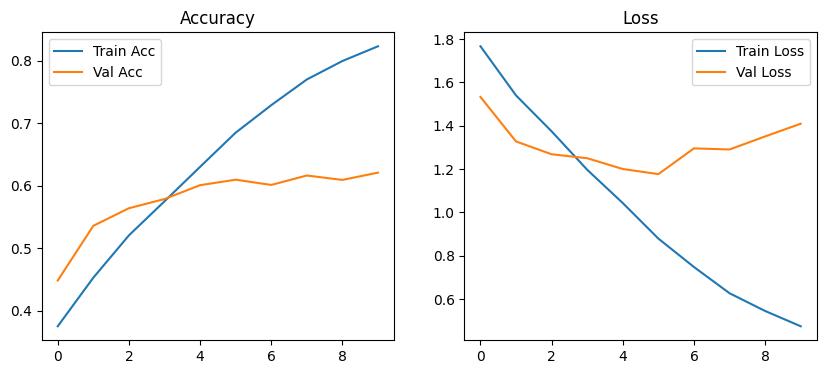

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/animal_classifier_model.h5')
print("✅ Model saved to Google Drive!")

✅ Model saved to Google Drive!


Testing image from class: pecora
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


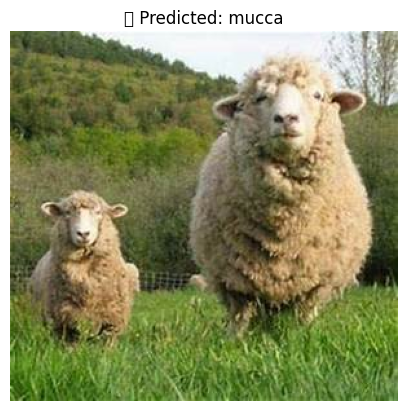

In [ ]:
import random

# pick a random class folder
random_class = random.choice(os.listdir('/content/drive/MyDrive/raw-img'))
test_folder = f'/content/drive/MyDrive/raw-img/{random_class}'
test_image_path = os.path.join(test_folder, random.choice(os.listdir(test_folder)))

print(f"Testing image from class: {random_class}")

# load and predict (same as before)
img = image.load_img(test_image_path, target_size=(128, 128))
x = image.img_to_array(img)/255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
classes = list(train_generator.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

plt.imshow(image.load_img(test_image_path))
plt.axis('off')
plt.title(f"🐾 Predicted: {predicted_class}")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/animal_classifier_model.h5')